In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from scipy.stats import stats
from scipy.stats import linregress
import seaborn as sns; sns.set()
import seaborn as sns; sns.set()


In [2]:
# Read CSV File 
# Data Source "https://www.kaggle.com/kevinzmith/honey-with-neonic-pesticide/home " 
#sources of the dataset is the National Agricultural Statistics Service (NASS) and 
# the United States Geological Survey (USGS), Honey Production Data 1991-2017 + Neonic pesticides
file = "/Users/richasingh/Desktop/UCIDB_Final_Project/honey-with-neonic-pesticide/vHoneyNeonic_v03.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")

In [3]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Data Overview for any cleanup requirements
df.count()

state            1132
numcol           1132
yieldpercol      1132
totalprod        1132
stocks           1132
priceperlb       1132
prodvalue        1132
year             1132
StateName        1132
Region           1132
FIPS             1132
nCLOTHIANIDIN     895
nIMIDACLOPRID     895
nTHIAMETHOXAM     895
nACETAMIPRID      895
nTHIACLOPRID      895
nAllNeonic        895
dtype: int64

In [5]:
df.dtypes

state             object
numcol           float64
yieldpercol        int64
totalprod        float64
stocks           float64
priceperlb       float64
prodvalue        float64
year               int64
StateName         object
Region            object
FIPS               int64
nCLOTHIANIDIN    float64
nIMIDACLOPRID    float64
nTHIAMETHOXAM    float64
nACETAMIPRID     float64
nTHIACLOPRID     float64
nAllNeonic       float64
dtype: object

In [6]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
count,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1132.000000,1.132000e+03,1132.000000,1132.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,62452.296820,61.809187,4.317093e+06,1.202020e+06,1.485928,4.932350e+06,2003.698763,30.275618,9260.332067,8944.121564,5293.034749,619.875642,102.432291,24219.796313
std,90698.022209,20.701807,6.962385e+06,2.026242e+06,0.966583,8.551674e+06,7.783332,15.586671,27769.597206,16378.524006,9697.447417,2387.930400,430.409906,47179.176730
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.460000,8.900000e+04,1991.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10000.000000,47.000000,5.192500e+05,1.280000e+05,0.750000,8.137500e+05,1997.000000,18.000000,0.000000,617.250000,0.000000,0.000000,0.000000,923.450000
50%,27000.000000,60.000000,1.607500e+06,4.110000e+05,1.260000,1.936000e+06,2003.000000,30.000000,33.400000,3186.600000,463.200000,0.000000,0.000000,5151.400000
75%,69250.000000,74.000000,4.325000e+06,1.377000e+06,1.920000,4.842500e+06,2010.000000,42.750000,4345.150000,9373.400000,5724.000000,202.600000,0.000000,26130.900000
max,520000.000000,177.000000,4.641000e+07,1.380000e+07,7.860000,8.385900e+07,2017.000000,56.000000,278498.800000,150569.300000,64834.600000,36480.300000,4273.200000,403011.600000


In [7]:
#count of uniques states
count_state = df["state"].value_counts()
count_state 

AL    27
IN    27
KY    27
CO    27
AZ    27
WI    27
MT    27
WA    27
TX    27
MI    27
AR    27
OR    27
MN    27
FL    27
ND    27
NJ    27
OH    27
NY    27
IL    27
MS    27
UT    27
WY    27
PA    27
WV    27
TN    27
ID    27
HI    27
LA    27
NC    27
MO    27
SD    27
IA    27
GA    27
ME    27
CA    27
NE    27
KS    27
VT    27
VA    27
NM    22
NV    18
SC    13
MD    13
OK    13
Name: state, dtype: int64

In [8]:
#Checking for null values
df.isnull().sum()

state              0
numcol             0
yieldpercol        0
totalprod          0
stocks             0
priceperlb         0
prodvalue          0
year               0
StateName          0
Region             0
FIPS               0
nCLOTHIANIDIN    237
nIMIDACLOPRID    237
nTHIAMETHOXAM    237
nACETAMIPRID     237
nTHIACLOPRID     237
nAllNeonic       237
dtype: int64

In [9]:
#drop nah
df.dropna(inplace=True)
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,1,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,1,680.0,4230.2,5371.6,0.0,0.0,10281.8


In [10]:
df.count()

state            895
numcol           895
yieldpercol      895
totalprod        895
stocks           895
priceperlb       895
prodvalue        895
year             895
StateName        895
Region           895
FIPS             895
nCLOTHIANIDIN    895
nIMIDACLOPRID    895
nTHIAMETHOXAM    895
nACETAMIPRID     895
nTHIACLOPRID     895
nAllNeonic       895
dtype: int64

# Statewise Honey Production 

In [11]:
Total_states = df["state"].nunique()
Total_states 

43

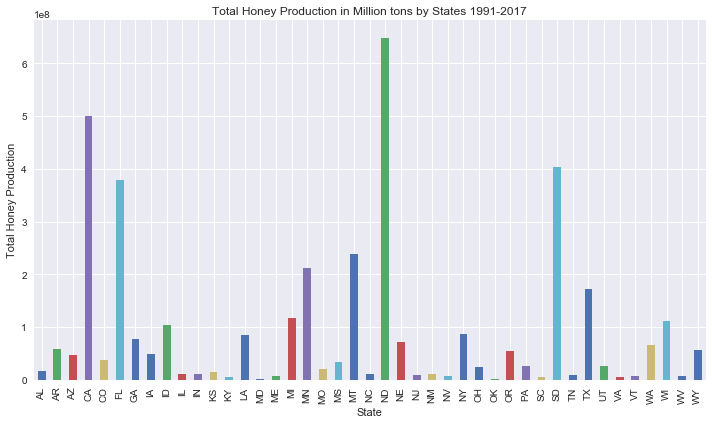

In [12]:
by_state = df.groupby("state")
Total_by_state = by_state["totalprod"].sum()


plt.figure(figsize=(10,6))
total_state = Total_by_state.plot(kind='bar')
total_state.set_title("Total Honey Production in Million tons by States 1991-2017")
total_state.set_xlabel("State")
total_state.set_ylabel("Total Honey Production")

plt.tight_layout()
plt.savefig('/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_Prod_states.png')
plt.show()

# Regionwise Honey Production and Yield

In [13]:
Total_Regions = df["Region"].nunique()
Total_Regions

4

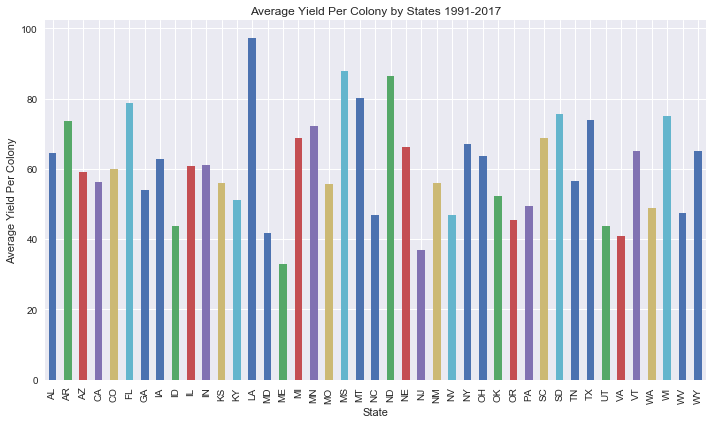

In [14]:
by_state = df.groupby("state")
avg_yield_by_state = by_state["yieldpercol"].mean()

plt.figure(figsize=(10,6))
avg_y_state = avg_yield_by_state.plot(kind='bar')
avg_y_state.set_title("Average Yield Per Colony by States 1991-2017")
avg_y_state.set_xlabel("State")
avg_y_state.set_ylabel("Average Yield Per Colony")

plt.tight_layout()
plt.savefig('/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Avg_yield_states.png')
plt.show()

In [15]:
# Avg Honey yield by regions
by_region = df.groupby("Region")
yield_by_region = by_region["yieldpercol"].mean()
yield_by_region

Region
Midwest      66.935115
Northeast    50.227273
South        63.520690
West         55.158798
Name: yieldpercol, dtype: float64

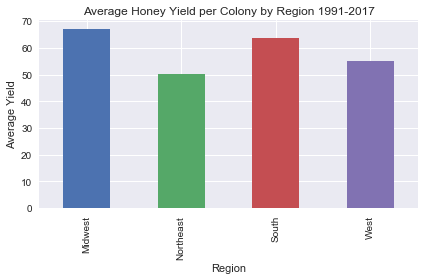

In [16]:
yield_region = yield_by_region.plot(kind='bar')

yield_region.set_title("Average Honey Yield per Colony by Region 1991-2017")
yield_region.set_xlabel("Region")
yield_region.set_ylabel("Average Yield")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/yield_region.png")
plt.show() 

In [17]:
# Total honey production  by regions
Total_by_region = by_region["totalprod"].sum()
Total_by_region

Region
Midwest      1.694332e+09
Northeast    1.353810e+08
South        8.647990e+08
West         1.147377e+09
Name: totalprod, dtype: float64

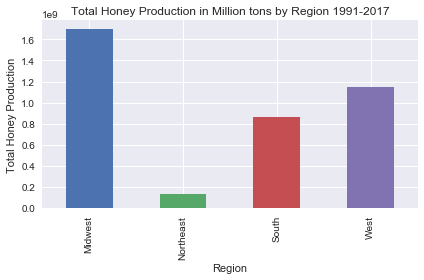

In [18]:
total_region = Total_by_region.plot(kind='bar')

total_region.set_title("Total Honey Production in Million tons by Region 1991-2017")
total_region.set_xlabel("Region")
total_region.set_ylabel("Total Honey Production")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_prod_region.png")
plt.show()

In [19]:
# Total share in honey production  by regions
 
Total_honey_all = df["totalprod"].sum()

percent_region = Total_by_region/Total_honey_all*100 
percent_region

Region
Midwest      44.101534
Northeast     3.523813
South        22.509734
West         29.864918
Name: totalprod, dtype: float64

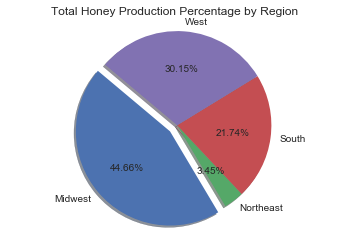

In [20]:
labels = ["Midwest", "Northeast", "South", "West"]

# The values of each section of the pie chart
sizes = [44.66, 3.45, 21.74, 30.15]

explode = (0.1, 0, 0, 0)
plt.title("Total Honey Production Percentage by Region")
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_honey_pie.png")
plt.show()

In [21]:
# Honey Production Trends by regions
# total production
by_year_region = df.groupby(["Region", "year"])

total_by_year = by_year_region["totalprod"].sum()
 
total_by_year = pd.DataFrame(total_by_year).reset_index()
 
df_MW = total_by_year[(total_by_year.Region == "Midwest")]
df_NE = total_by_year[(total_by_year.Region == "Northeast")]
df_sth = total_by_year[(total_by_year.Region == "South")]
df_west = total_by_year[(total_by_year.Region == "West")]
df_west.head() 

,Region,year,totalprod
67,West,1994,41992000.0
68,West,1995,70541000.0
69,West,1996,56454000.0
70,West,1997,68849000.0
71,West,1998,73562000.0


In [22]:
# Average Yield
by_year_region = df.groupby(["Region", "year"])

total_yield_by_year = by_year_region["yieldpercol"].mean()
 
total_yield_by_year = pd.DataFrame(total_yield_by_year).reset_index()
 
df_MW_yield = total_yield_by_year[(total_yield_by_year.Region == "Midwest")]
df_NE_yield = total_yield_by_year[(total_yield_by_year.Region == "Northeast")]
df_sth_yield = total_yield_by_year[(total_yield_by_year.Region == "South")]
df_west_yield = total_yield_by_year[(total_yield_by_year.Region == "West")]
df_west_yield.head() 

,Region,year,yieldpercol
67,West,1994,59.833333
68,West,1995,57.636364
69,West,1996,62.090909
70,West,1997,66.727273
71,West,1998,63.818182


# Trends in yield and total honey production by regions 

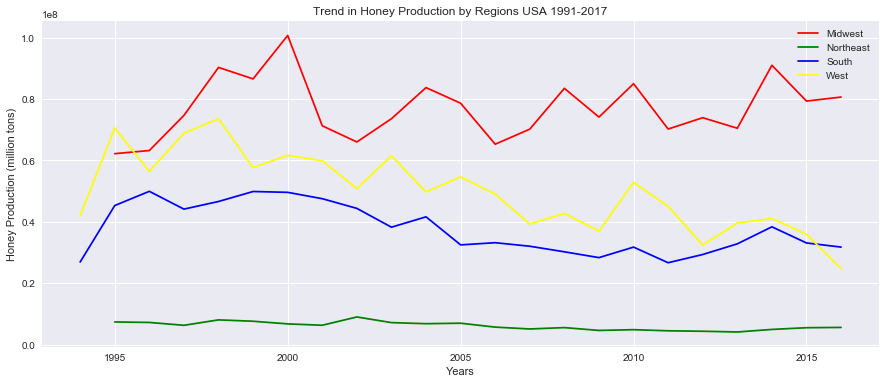

In [23]:
# Time series by region Total Honey Production

plt.figure(figsize=(15,6)) 
Midwest, = plt.plot(df_MW['year'], df_MW['totalprod'], color="red", label="Midwest" )
Northeast,= plt.plot(df_NE['year'], df_NE['totalprod'], color="green", label="Northeast" )
South, = plt.plot(df_sth['year'], df_sth['totalprod'], color="blue" ,label= "South" )
West, = plt.plot(df_west['year'], df_west['totalprod'], color="yellow", label ="West")
plt.title('Trend in Honey Production by Regions USA 1991-2017')
plt.ylabel('Honey Production (million tons)')
plt.xlabel('Years')
plt.legend(handles=[Midwest, Northeast, South, West], loc="best");
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_honey_region_trend.png")
plt.show()
 
 

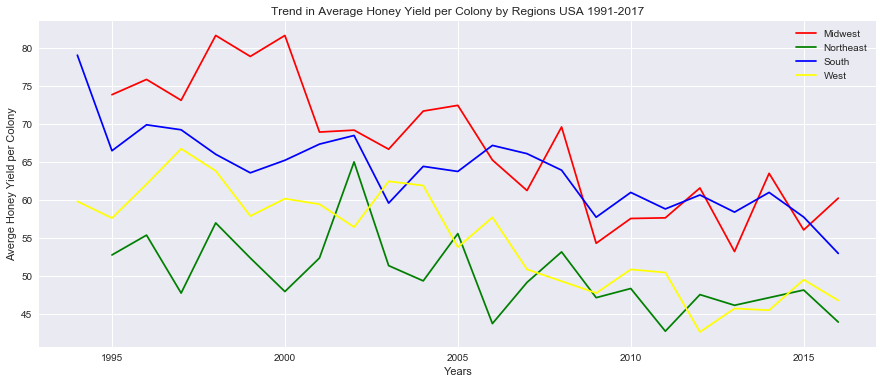

In [24]:
# Time trend by region 

plt.figure(figsize=(15,6)) 
Midwesty, = plt.plot(df_MW_yield['year'], df_MW_yield['yieldpercol'], color="red", label="Midwest" )
Northeasty,= plt.plot(df_NE_yield['year'], df_NE_yield['yieldpercol'], color="green", label="Northeast" )
Southy, = plt.plot(df_sth_yield['year'], df_sth_yield['yieldpercol'], color="blue" ,label= "South" )
Westy, = plt.plot(df_west_yield['year'], df_west_yield['yieldpercol'], color="yellow", label ="West")
plt.title('Trend in Average Honey Yield per Colony by Regions USA 1991-2017')
plt.ylabel('Averge Honey Yield per Colony')
plt.xlabel('Years')
plt.legend(handles=[Midwesty, Northeasty, Southy, Westy], loc="best");
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Yield_honey_region_trend.png")
plt.show()

# Trends in price of honey 

In [25]:
# Average price by region and time 

avg_price_by_region = by_region["priceperlb"].mean()

avg_price_by_region_time = by_year_region["priceperlb"].mean()

avg_price_by_region_time = pd.DataFrame(avg_price_by_region_time).reset_index()

df_MW_price = avg_price_by_region_time[(avg_price_by_region_time.Region == "Midwest")]
df_NE_price = avg_price_by_region_time[(avg_price_by_region_time.Region == "Northeast")]
df_sth_price = avg_price_by_region_time[(avg_price_by_region_time.Region == "South")]
df_west_price = avg_price_by_region_time[(avg_price_by_region_time.Region == "West")]
df_west_price.head() 
 
 

,Region,year,priceperlb
67,West,1994,0.613333
68,West,1995,0.716364
69,West,1996,0.894545
70,West,1997,0.796364
71,West,1998,0.775455


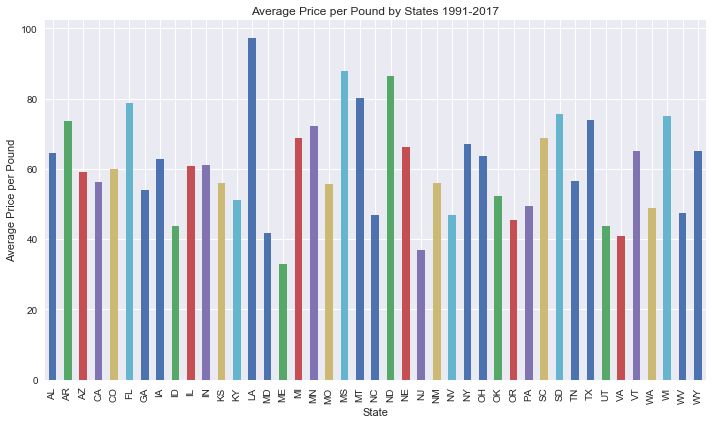

In [26]:
by_state = df.groupby("state")
avg_price_by_state = by_state["priceperlb"].mean()

plt.figure(figsize=(10,6))
avg_pr_state = avg_yield_by_state.plot(kind='bar')
avg_pr_state.set_title("Average Price per Pound by States 1991-2017")
avg_pr_state.set_xlabel("State")
avg_pr_state.set_ylabel("Average Price per Pound")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/price_state.png")
plt.show()

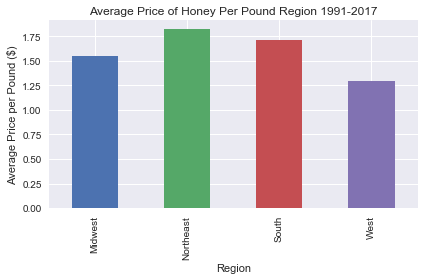

In [27]:
price_region = avg_price_by_region.plot(kind='bar')

price_region.set_title("Average Price of Honey Per Pound Region 1991-2017")
price_region.set_xlabel("Region")
price_region.set_ylabel("Average Price per Pound ($)")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/price_region.png")
plt.show()

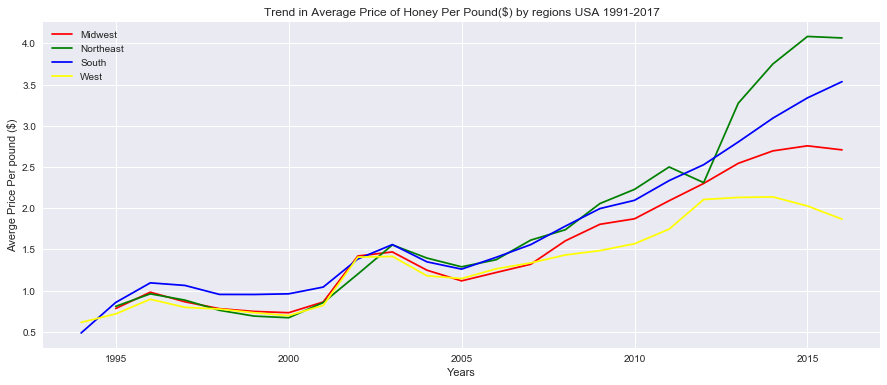

In [28]:
# Time trend by region 

plt.figure(figsize=(15,6)) 
Midwestp, = plt.plot(df_MW_price['year'], df_MW_price['priceperlb'], color="red", label="Midwest" )
Northeastp,= plt.plot(df_NE_price['year'], df_NE_price['priceperlb'], color="green", label="Northeast" )
Southp, = plt.plot(df_sth_price['year'], df_sth_price['priceperlb'], color="blue" ,label= "South" )
Westp, = plt.plot(df_west_price['year'], df_west_price['priceperlb'], color="yellow", label ="West")
plt.title('Trend in Average Price of Honey Per Pound($) by regions USA 1991-2017')
plt.ylabel('Averge Price Per pound ($)')
plt.xlabel('Years')
plt.legend(handles=[Midwestp, Northeastp, Southp, Westp], loc="best");

plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/price_honey_region_trend.png")
plt.show()

# Trend in Neonic Pesticides 

In [29]:
# Average price by region and time 

total_pest_by_region = by_region["nAllNeonic"].sum()

avg_pest_by_region = by_region["nAllNeonic"].mean()

avg_pest_by_region_time = by_year_region["nAllNeonic"].mean()

avg_pest_by_region_time = pd.DataFrame(avg_pest_by_region_time).reset_index()

df_MW_pest = avg_pest_by_region_time[(avg_pest_by_region_time.Region == "Midwest")]
df_NE_pest = avg_pest_by_region_time[(avg_pest_by_region_time.Region == "Northeast")]
df_sth_pest = avg_pest_by_region_time[(avg_pest_by_region_time.Region == "South")]
df_west_pest = avg_pest_by_region_time[(avg_pest_by_region_time.Region == "West")]
df_west_pest.head() 

,Region,year,nAllNeonic
67,West,1994,1019.550000
68,West,1995,3823.100000
69,West,1996,4410.718182
70,West,1997,10348.463636
71,West,1998,8826.781818


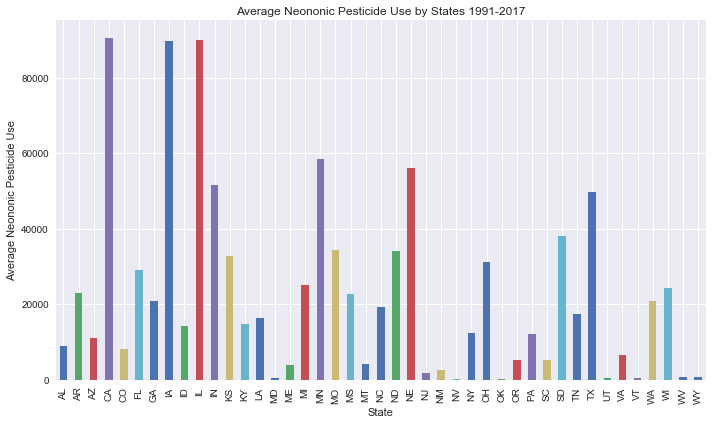

In [30]:
by_state = df.groupby("state")
avg_pest_by_state = by_state["nAllNeonic"].mean()
 

plt.figure(figsize=(10,6))
pest_by_state = avg_pest_by_state.plot(kind='bar')
pest_by_state.set_title("Average Neononic Pesticide Use by States 1991-2017")
pest_by_state.set_xlabel("State")
pest_by_state.set_ylabel("Average Neononic Pesticide Use")


plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/neononic_use_state.png",bbox_inches='tight')
plt.show()

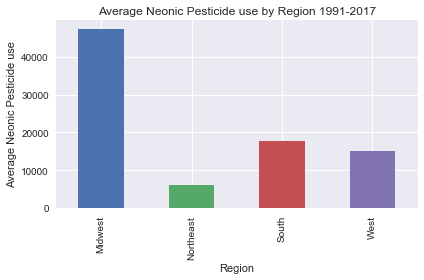

In [31]:
pest_region = avg_pest_by_region.plot(kind='bar')

pest_region.set_title("Average Neonic Pesticide use by Region 1991-2017")
pest_region.set_xlabel("Region")
pest_region.set_ylabel("Average Neonic Pesticide use")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/neononic_use_region.png")
plt.show()

In [32]:
Total_pest_all = df["nAllNeonic"].sum()

percent_region_pest = total_pest_by_region/Total_pest_all*100 
percent_region_pest

Region
Midwest      57.066580
Northeast     3.107176
South        23.711719
West         16.114525
Name: nAllNeonic, dtype: float64

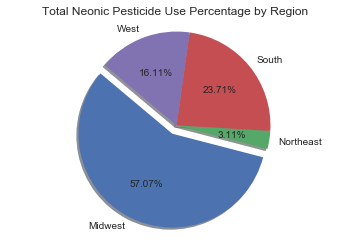

In [33]:
labels = ["Midwest", "Northeast", "South", "West"]

# The values of each section of the pie chart
sizes = [57.07, 3.11, 23.71, 16.11]

explode = (0.1, 0, 0, 0)
plt.title("Total Neonic Pesticide Use Percentage by Region")
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_pest_pie.png")
plt.show()

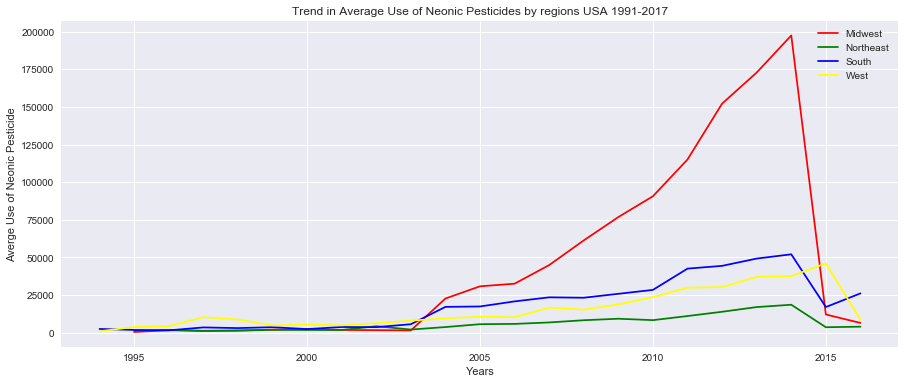

In [34]:
# Time trend by region 
plt.figure(figsize=(15,6)) 
Midwestpest, = plt.plot(df_MW_pest['year'], df_MW_pest['nAllNeonic'], color="red", label="Midwest" )
Northeastpest,= plt.plot(df_NE_pest['year'], df_NE_pest['nAllNeonic'], color="green", label="Northeast" )
Southpest, = plt.plot(df_sth_pest['year'], df_sth_pest['nAllNeonic'], color="blue" ,label= "South" )
Westpest, = plt.plot(df_west_pest['year'], df_west_pest['nAllNeonic'], color="yellow", label ="West")
plt.title('Trend in Average Use of Neonic Pesticides by regions USA 1991-2017')
plt.ylabel('Averge Use of Neonic Pesticide')
plt.xlabel('Years')
plt.legend(handles=[Midwestpest, Northeastpest, Southpest, Westpest], loc="best");

plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/pest_honey_region_trend.png")
plt.show()

In [35]:
# Number of Colonies
by_state = df.groupby("state")
Total_col_by_state = by_state["numcol"].sum()

Total_col_by_state.head()

state
AL     245000.0
AR     759000.0
AZ     759000.0
CA    8655000.0
CO     612000.0
Name: numcol, dtype: float64

In [36]:
Total_col_by_region_time = by_year_region["numcol"].sum()

Total_col_by_region_time = pd.DataFrame(Total_col_by_region_time).reset_index()

df_MW_col = Total_col_by_region_time[(Total_col_by_region_time.Region == "Midwest")]
df_NE_col = Total_col_by_region_time[(Total_col_by_region_time.Region == "Northeast")]
df_sth_col = Total_col_by_region_time[(Total_col_by_region_time.Region == "South")]
df_west_col = Total_col_by_region_time[(Total_col_by_region_time.Region == "West")]
df_west_col.head()
 

,Region,year,numcol
67,West,1994,698000.0
68,West,1995,959000.0
69,West,1996,894000.0
70,West,1997,933000.0
71,West,1998,975000.0


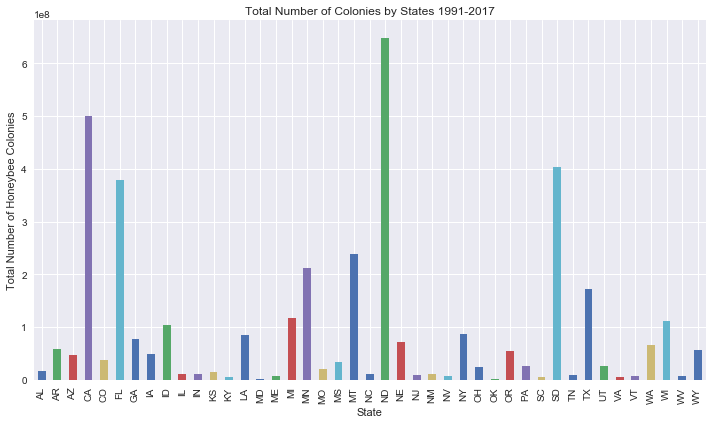

In [37]:
plt.figure(figsize=(10,6))
total_col_state = Total_by_state.plot(kind='bar')
total_col_state.set_title("Total Number of Colonies by States 1991-2017")
total_col_state.set_xlabel("State")
total_col_state.set_ylabel("Total Number of Honeybee Colonies")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/Col_state.png")
plt.show()

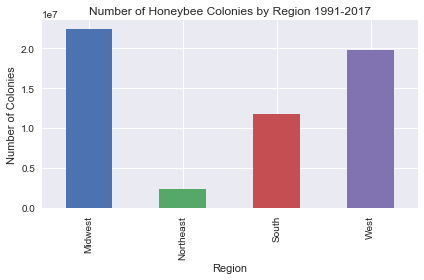

In [38]:
Total_col_by_region = by_region["numcol"].sum()
col_region = Total_col_by_region.plot(kind='bar')

col_region.set_title("Number of Honeybee Colonies by Region 1991-2017")
col_region.set_xlabel("Region")
col_region.set_ylabel("Number of Colonies")

plt.tight_layout()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/col_region.png")
plt.show()

In [39]:
Total_col_all = df["numcol"].sum()

percent_region_col = Total_col_by_region/Total_col_all*100 
percent_region_col

Region
Midwest      39.814255
Northeast     4.191723
South        20.853646
West         35.140376
Name: numcol, dtype: float64

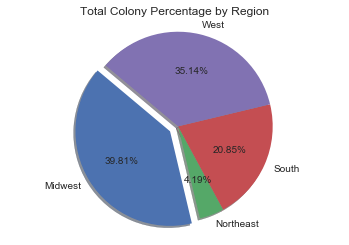

In [40]:
labels = ["Midwest", "Northeast", "South", "West"]

# The values of each section of the pie chart
sizes = [39.81, 4.19, 20.85, 35.14]

explode = (0.1, 0, 0, 0)
plt.title("Total Colony Percentage by Region")
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/total_col_pie.png")
plt.show()

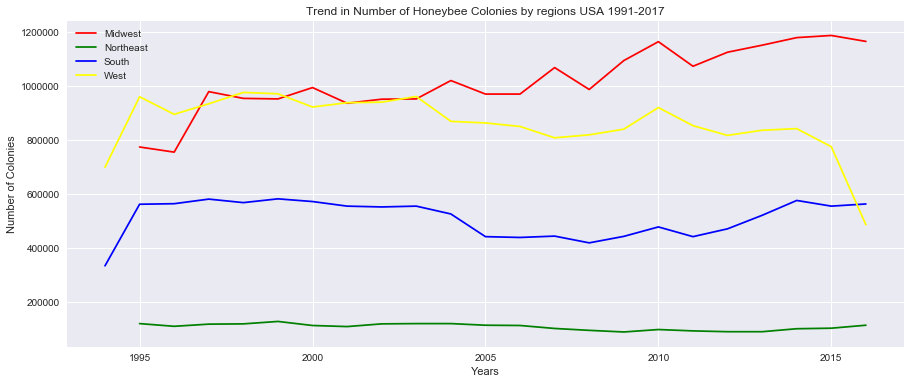

<Figure size 432x288 with 0 Axes>

In [41]:
# Time trend by region 
plt.figure(figsize=(15,6)) 
Midwestcol, = plt.plot(df_MW_col['year'], df_MW_col['numcol'], color="red", label="Midwest" )
Northeastcol,= plt.plot(df_NE_col['year'], df_NE_col['numcol'], color="green", label="Northeast" )
Southcol, = plt.plot(df_sth_col['year'], df_sth_col['numcol'], color="blue" ,label= "South" )
Westcol, = plt.plot(df_west_col['year'], df_west_col['numcol'], color="yellow", label ="West")
plt.title('Trend in Number of Honeybee Colonies by regions USA 1991-2017')
plt.ylabel('Number of Colonies')
plt.xlabel('Years')
plt.legend(handles=[Midwestcol, Northeastcol, Southcol, Westcol], loc="best");
plt.show()
plt.savefig("/Users/richasingh/Desktop/UCIDB_Final_Project/Images/col_honey_region_trend.png")

# Relationship Analysis 

Text(0.5,0.98,'Number of Colonies and Use of Neononic Pesticides')

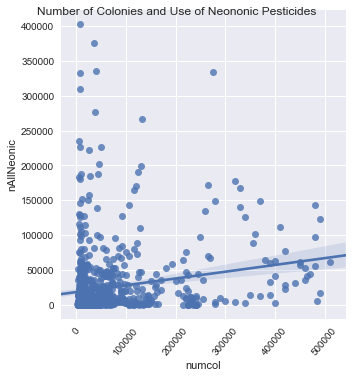

In [42]:
r = sns.lmplot('numcol', 'nAllNeonic', data=df, fit_reg=True)

r.set_xticklabels(rotation=50)
r.fig.suptitle('Number of Colonies and Use of Neononic Pesticides')

Text(0.5,0.98,'Number of Colonies Vs Yield per col')

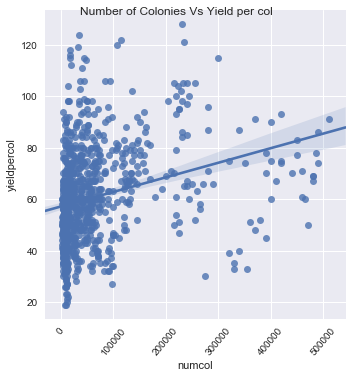

In [43]:
yr = sns.lmplot('numcol', 'yieldpercol', data=df, fit_reg=True)

yr.set_xticklabels(rotation=50)
yr.fig.suptitle('Number of Colonies Vs Yield per col')

Text(0.5,0.98,'Number of Colonies Vs Total Yield')

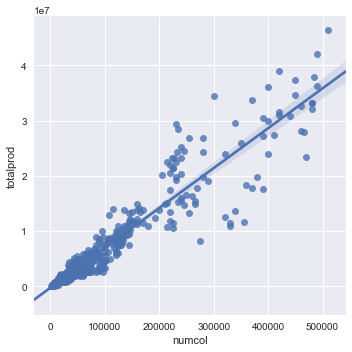

In [44]:
r = sns.lmplot('numcol', 'totalprod', data=df , fit_reg=True)

yr.set_xticklabels(rotation=50)
yr.fig.suptitle('Number of Colonies Vs Total Yield')

In [45]:
# Correlation Analysis 
corr = df.corr()
corr

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
numcol,1.000000,0.279088,0.955114,0.821658,-0.203135,0.889086,0.018017,-0.116882,0.022015,0.409895,0.092107,0.318224,-0.032633,0.189996
yieldpercol,0.279088,1.000000,0.435267,0.402141,-0.375624,0.292084,-0.261311,-0.078716,-0.048182,-0.081020,0.021389,-0.116265,-0.105431,-0.058936
totalprod,0.955114,0.435267,1.000000,0.867106,-0.231405,0.882415,-0.044383,-0.077540,0.002455,0.274404,0.068303,0.165876,-0.055876,0.118631
stocks,0.821658,0.402141,0.867106,1.000000,-0.257812,0.714838,-0.079300,0.021972,0.001051,0.160943,0.029506,0.114871,-0.019246,0.068194
priceperlb,-0.203135,-0.375624,-0.231405,-0.257812,1.000000,-0.038741,0.743497,0.110133,0.262087,0.198470,0.261383,0.041519,0.109933,0.279994
prodvalue,0.889086,0.292084,0.882415,0.714838,-0.038741,1.000000,0.196882,-0.031397,0.104103,0.357058,0.215125,0.217413,-0.007690,0.240381
year,0.018017,-0.261311,-0.044383,-0.079300,0.743497,0.196882,1.000000,0.016700,0.315925,0.354881,0.467843,0.169439,0.179026,0.415524
FIPS,-0.116882,-0.078716,-0.077540,0.021972,0.110133,-0.031397,0.016700,1.000000,-0.081233,-0.264478,-0.085272,-0.084765,0.142158,-0.160150
nCLOTHIANIDIN,0.022015,-0.048182,0.002455,0.001051,0.262087,0.104103,0.315925,-0.081233,1.000000,0.510284,0.750403,0.019093,-0.009031,0.920872
nIMIDACLOPRID,0.409895,-0.081020,0.274404,0.160943,0.198470,0.357058,0.354881,-0.264478,0.510284,1.000000,0.534640,0.542934,-0.018258,0.784714


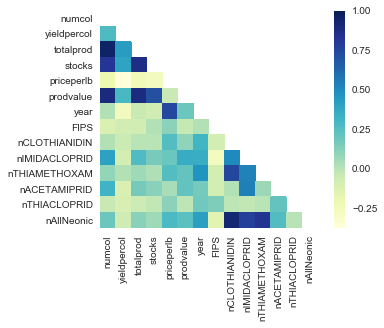

In [46]:
# correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax= 1, square=True,  cmap="YlGnBu")
    plt.show()

Text(0.5,0.98,'Relation between Honey Production and Use Of Neonic pesticides')

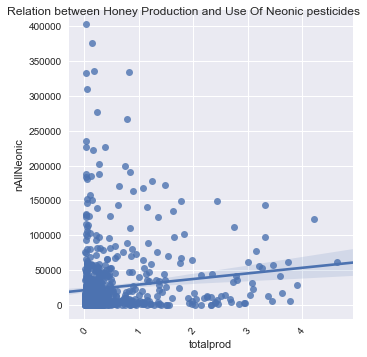

In [47]:
pest_total = sns.lmplot('totalprod', 'nAllNeonic', data=df, fit_reg=True)

pest_total.set_xticklabels(rotation=50)
pest_total.fig.suptitle('Relation between Honey Production and Use Of Neonic pesticides')

In [48]:
# correlation between total production and use of Neonic pesticides 
correlation = df['totalprod'].corr(df['nAllNeonic']).round(2)
correlation

0.12

In [49]:
# correlation between yield and use of Neonic pesticides 
correlation2 = df['yieldpercol'].corr(df['nAllNeonic']).round(2)
correlation2

-0.06

In [50]:
# correlation between number of colonies and use of Neonic pesticides 
correlation3 = df['numcol'].corr(df['nAllNeonic']).round(2)
correlation3

0.19

In [51]:
# correlation between number of colonies and total production
correlation4 = df['numcol'].corr(df['totalprod']).round(2)
correlation4

0.96

In [52]:
# correlation between number of colonies and yield
correlation4 = df['numcol'].corr(df['yieldpercol']).round(2)
correlation4

0.28

# Pre and post 2003 analysis
#use of neononic pesticides increased after 2003

In [53]:
# Splitting data by year as neononic pesticide use increased in 2003
databefore2003 = df[(df.year < 2003)]
databefore2003.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
9,AL,12000.0,86,1032000.0,103000.0,1.18,1218000.0,2002,Alabama,South,1,0.0,1178.8,840.4,0.0,0.0,2019.2
13,AL,14000.0,73,1022000.0,235000.0,0.72,736000.0,2001,Alabama,South,1,0.0,1490.8,0.0,0.0,0.0,1490.8


In [54]:
dataafter2003 = df[(df.year >= 2003)]
dataafter2003.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,1,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,1,680.0,4230.2,5371.6,0.0,0.0,10281.8
10,AL,12000.0,87,1044000.0,282000.0,1.41,1472000.0,2004,Alabama,South,1,2676.4,1323.9,3863.9,0.0,0.0,7864.2
11,AL,13000.0,66,858000.0,266000.0,1.02,875000.0,2005,Alabama,South,1,1503.6,994.5,5493.9,0.0,0.0,7992.0
12,AL,13000.0,82,1066000.0,43000.0,1.24,1322000.0,2003,Alabama,South,1,0.0,668.3,591.7,0.0,0.0,1260.0


In [55]:
# correlation before 2003
corr1 = databefore2003.corr()
corr1

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
numcol,1.000000,0.358135,0.957725,0.818383,-0.310792,0.929071,-0.024667,-0.205182,NaN,0.654497,0.139857,0.176419,NaN,0.656200
yieldpercol,0.358135,1.000000,0.508085,0.464600,-0.293304,0.457113,-0.021375,-0.109266,NaN,0.082384,-0.010366,-0.040847,NaN,0.078848
totalprod,0.957725,0.508085,1.000000,0.861243,-0.324849,0.939482,-0.029530,-0.170298,NaN,0.574159,0.062892,0.094738,NaN,0.570187
stocks,0.818383,0.464600,0.861243,1.000000,-0.341563,0.778512,0.029524,-0.037876,NaN,0.450361,-0.019324,0.009807,NaN,0.441120
priceperlb,-0.310792,-0.293304,-0.324849,-0.341563,1.000000,-0.175931,0.306034,0.152862,NaN,-0.149184,0.206775,0.100889,NaN,-0.131116
prodvalue,0.929071,0.457113,0.939482,0.778512,-0.175931,1.000000,0.043249,-0.146777,NaN,0.546009,0.208334,0.210686,NaN,0.554837
year,-0.024667,-0.021375,-0.029530,0.029524,0.306034,0.043249,1.000000,0.015091,NaN,0.037426,0.318009,0.155603,NaN,0.060209
FIPS,-0.205182,-0.109266,-0.170298,-0.037876,0.152862,-0.146777,0.015091,1.000000,NaN,-0.226464,-0.092635,0.012682,NaN,-0.227066
nCLOTHIANIDIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nIMIDACLOPRID,0.654497,0.082384,0.574159,0.450361,-0.149184,0.546009,0.037426,-0.226464,NaN,1.000000,0.168349,0.176877,NaN,0.996849


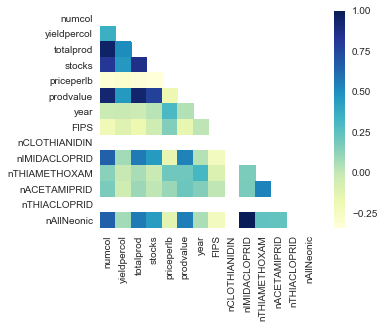

In [56]:
# correlation matrix pre 2003
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr1, mask=mask, vmax=1, square=True, cmap="YlGnBu")
    plt.show()

In [57]:
#correlation between total production and use of Neonic pesticides 
correlation5 = databefore2003['totalprod'].corr(databefore2003['nAllNeonic']).round(2)
correlation5

0.57

In [58]:
#correlation between yield and use of Neonic pesticides 
correlation6 = databefore2003['yieldpercol'].corr(databefore2003['nAllNeonic']).round(2)
correlation6

0.08

In [59]:
#correlation between number of colonies and use of Neonic pesticides 
correlation7 = databefore2003['numcol'].corr(databefore2003['nAllNeonic']).round(2)
correlation7

0.66

In [60]:
# correlation between number of colonies and total production
correlation8 = databefore2003['numcol'].corr(databefore2003['totalprod']).round(2)
correlation8

0.96

In [61]:
# correlation between number of colonies and yield
correlation9 = databefore2003['numcol'].corr(databefore2003['yieldpercol']).round(2)
correlation9

0.36

In [62]:
# correlation before 2003
corr2 = dataafter2003.corr()
corr2

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
numcol,1.000000,0.246557,0.959745,0.836977,-0.261423,0.925851,0.031064,-0.066932,0.024581,0.403911,0.116524,0.390478,-0.043566,0.197084
yieldpercol,0.246557,1.000000,0.383383,0.340814,-0.357009,0.328757,-0.189497,-0.058501,0.017459,-0.048589,0.182248,-0.098871,-0.088381,0.024284
totalprod,0.959745,0.383383,1.000000,0.872534,-0.262278,0.951659,-0.007435,-0.016284,0.019253,0.262694,0.124365,0.227854,-0.063157,0.138150
stocks,0.836977,0.340814,0.872534,1.000000,-0.280520,0.789149,-0.060180,0.065397,0.028898,0.144540,0.091662,0.178362,-0.007280,0.094901
priceperlb,-0.261423,-0.357009,-0.262278,-0.280520,1.000000,-0.150383,0.648551,0.137032,0.147021,0.067604,0.027567,-0.091917,0.004196,0.113499
prodvalue,0.925851,0.328757,0.951659,0.789149,-0.150383,1.000000,0.146009,0.001000,0.072218,0.307270,0.178767,0.202980,-0.040246,0.195498
year,0.031064,-0.189497,-0.007435,-0.060180,0.648551,0.146009,1.000000,0.024776,0.197124,0.258045,0.243807,0.003381,0.042608,0.257973
FIPS,-0.066932,-0.058501,-0.016284,0.065397,0.137032,0.001000,0.024776,1.000000,-0.109134,-0.314570,-0.121175,-0.112346,0.182606,-0.202820
nCLOTHIANIDIN,0.024581,0.017459,0.019253,0.028898,0.147021,0.072218,0.197124,-0.109134,1.000000,0.491934,0.731134,-0.035231,-0.062418,0.922093
nIMIDACLOPRID,0.403911,-0.048589,0.262694,0.144540,0.067604,0.307270,0.258045,-0.314570,0.491934,1.000000,0.497917,0.538762,-0.079038,0.770190


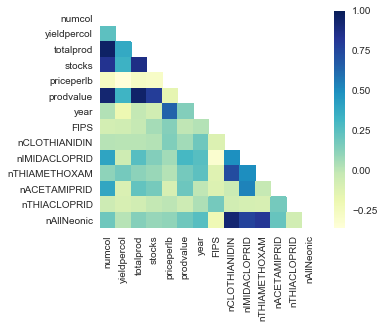

In [63]:
# correlation matrix post 2003
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr2, mask=mask, vmax=1, square=True, cmap="YlGnBu")
    plt.show()

In [64]:
#correlation between total production and use of Neonic pesticides 
correlation10 = dataafter2003['totalprod'].corr(dataafter2003['nAllNeonic']).round(2)
correlation10

0.14

In [65]:
#correlation between yield and use of Neonic pesticides 
correlation11 = dataafter2003['yieldpercol'].corr(dataafter2003['nAllNeonic']).round(2)
correlation11

0.02

In [66]:
#correlation between number of colonies and use of Neonic pesticides 
correlation12 = dataafter2003['numcol'].corr(dataafter2003['nAllNeonic']).round(2)
correlation12

0.2

In [67]:
# correlation between number of colonies and total production
correlation13 =dataafter2003['numcol'].corr(dataafter2003['totalprod']).round(2)
correlation13

0.96

In [68]:
# correlation between number of colonies and yield
correlation14 = dataafter2003['numcol'].corr(dataafter2003['yieldpercol']).round(2)
correlation14

0.25

# Regression model 

In [69]:
#  Neononic Pesticides and  Number of Colonies 
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = df["nAllNeonic"].values.reshape(-1, 1)
y = df["numcol"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (895, 1) (895, 1)


Text(0,0.5,'Use of Neononic Pesticides')

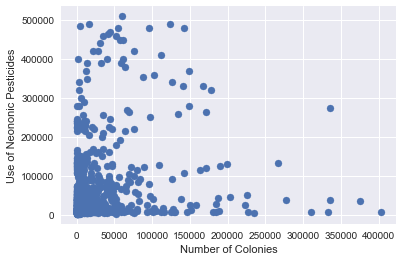

In [70]:
# Plot the data to see if a linear trend exists
 
plt.scatter(X, y)
plt.xlabel("Number of Colonies")
plt.ylabel("Use of Neononic Pesticides")
 

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

 

# Use our model to make predictions
predicted = model.predict(X)

# Score the predictions with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

 

Mean Squared Error (MSE): 8159690504.898761
R-squared (R2 ): 0.03609859997166065


In [73]:
model.score(X, y)

0.03609859997166065

In [74]:
#  Neononic Pesticides and  Yield per col
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = df["nAllNeonic"].values.reshape(-1, 1)
y = df["yieldpercol"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (895, 1) (895, 1)


Text(0,0.5,'Use of Neononic Pesticides')

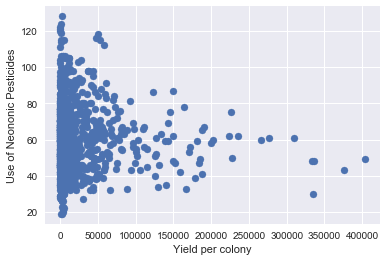

In [75]:
# Plot the data to see if a linear trend exists
 
plt.scatter(X, y)
plt.xlabel("Yield per colony")
plt.ylabel("Use of Neononic Pesticides")

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X)

# Score the predictions with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

 

Mean Squared Error (MSE): 348.2971170167485
R-squared (R2 ): 0.0034734853961407852


In [78]:
model.score(X, y)

0.0034734853961407857

In [81]:
# PRE 2003
#Neononic Pesticides and  Number of Colonies 
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = databefore2003["nAllNeonic"].values.reshape(-1, 1)
y = databefore2003["numcol"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (346, 1) (346, 1)


Text(0,0.5,'Use of Neononic Pesticides')

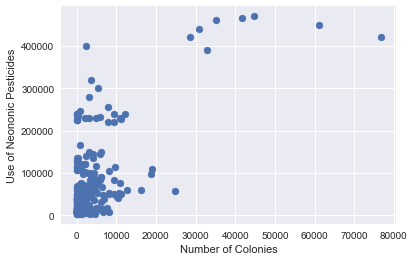

In [82]:
# Plot the data to see if a linear trend exists
 
plt.scatter(X, y)
plt.xlabel("Number of Colonies")
plt.ylabel("Use of Neononic Pesticides")
 

In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X)

# Score the predictions with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

 

Mean Squared Error (MSE): 4289864834.622889
R-squared (R2 ): 0.43059864359018485


In [85]:
# PRE 2003
#Neononic Pesticides and  yield
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = databefore2003["nAllNeonic"].values.reshape(-1, 1)
y = databefore2003["yieldpercol"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (346, 1) (346, 1)


Text(0,0.5,'Use of Neononic Pesticides')

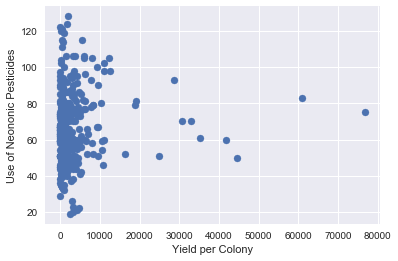

In [86]:
# Plot the data to see if a linear trend exists
 
plt.scatter(X, y)
plt.xlabel("Yield per Colony")
plt.ylabel("Use of Neononic Pesticides")
 

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X)

# Score the predictions with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")



Mean Squared Error (MSE): 7026249239.745612
R-squared (R2 ): -18025863.14365878


In [93]:
# Post 2003
#Neononic Pesticides and  Number of Colonies 
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = dataafter2003["nAllNeonic"].values.reshape(-1, 1)
y = dataafter2003["numcol"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (549, 1) (549, 1)


Text(0,0.5,'Use of Neononic Pesticides')

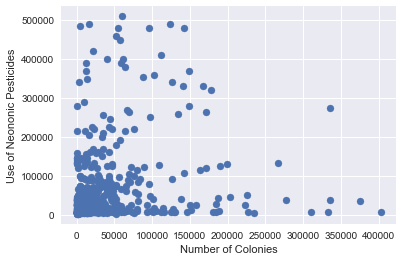

In [94]:
# Plot the data to see if a linear trend exists
 
plt.scatter(X, y)
plt.xlabel("Number of Colonies")
plt.ylabel("Use of Neononic Pesticides")
 

In [95]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X)

# Score the predictions with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")



Mean Squared Error (MSE): 8699095732.892006
R-squared (R2 ): 0.03884203961557364


In [97]:
#Neononic Pesticides and yield
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = dataafter2003["nAllNeonic"].values.reshape(-1, 1)
y = dataafter2003["yieldpercol"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (549, 1) (549, 1)


Text(0,0.5,'Use of Neononic Pesticides')

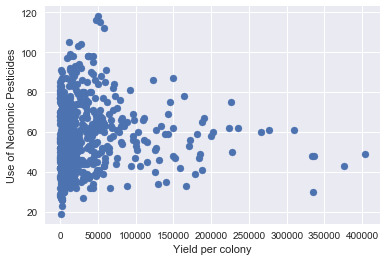

In [98]:
# Plot the data to see if a linear trend exists
 
plt.scatter(X, y)
plt.xlabel("Yield per colony")
plt.ylabel("Use of Neononic Pesticides")

In [99]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X)

# Score the predictions with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")




Mean Squared Error (MSE): 294.4376773435704
R-squared (R2 ): 0.0005897057115382687
